In [44]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns; sns.set_style("white")
import umap.plot
%matplotlib inline
os.getcwd()

'/Users/chririn/Documents/Code/2D_analysis_v2'

In [45]:
def pDose(x):
    '''This is just a helper function, to compute easily log transformed concentrations used in drug discovery'''
    return(-np.log10(1e-6*x))

In [46]:
BaseDir = "./results/"


In [47]:
# Import feature data after QC
selected_df = pd.read_csv("{}colopaint44_selected_data_notMAD.csv".format(BaseDir), sep=";", index_col=0)

selected_df.head(1)


,Metadata_layout_id,Metadata_well_id,Metadata_cmpd,Metadata_batch_id,Metadata_solvent,Metadata_stock_conc,Metadata_stock_conc_unit,Metadata_cmpd_vol,Metadata_cmpd_vol_unit,Metadata_well_vol,...,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,Location_MaxIntensity_Z_illumPHAandWGA_nuclei,RadialDistribution_ZernikePhase_illumMITO_8_0_nuclei,RadialDistribution_ZernikePhase_illumPHAandWGA_6_6_cells,Correlation_Costes_illumCONC_illumMITO_cytoplasm,Correlation_K_illumCONC_illumMITO_nuclei,RadialDistribution_ZernikePhase_illumPHAandWGA_6_6_cytoplasm,AreaShape_Zernike_6_6_cells,RadialDistribution_ZernikePhase_illumMITO_1_1_cells,Correlation_Costes_illumCONC_illumPHAandWGA_nuclei
0,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,[tetr],PHB000015,dmso,10.0,mM,7.5,nL,30,...,0.392774,0.0,1.991515,1.031468,0.777336,0.295102,0.678666,-1.301256,2.650399,0.0


In [48]:
df_toplot = selected_df
#df_toplot['Metadata_cmpd_conc'].loc[(df_toplot['Metadata_cmpd'] == '[dmso]')] = 0.0001
df_toplot['Metadata_inv_log_conc'] = 10 - pDose(df_toplot['Metadata_cmpd_conc'])
ListOfMetadata = list(df_toplot.columns[df_toplot.columns.str.contains("Metadata_")])
training_data = df_toplot.drop(ListOfMetadata, axis=1).to_numpy()

reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist= 0.1, random_state=42)
embedding = reducer.fit_transform(training_data)

In [49]:
ListOfMoa = df_toplot['Metadata_moa'].unique()
ListOfMoa = ListOfMoa[1:24]

/var/folders/bx/43bwk4n57dj9446w1ddn_7t40000gn/T/ipykernel_93716/1147407100.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


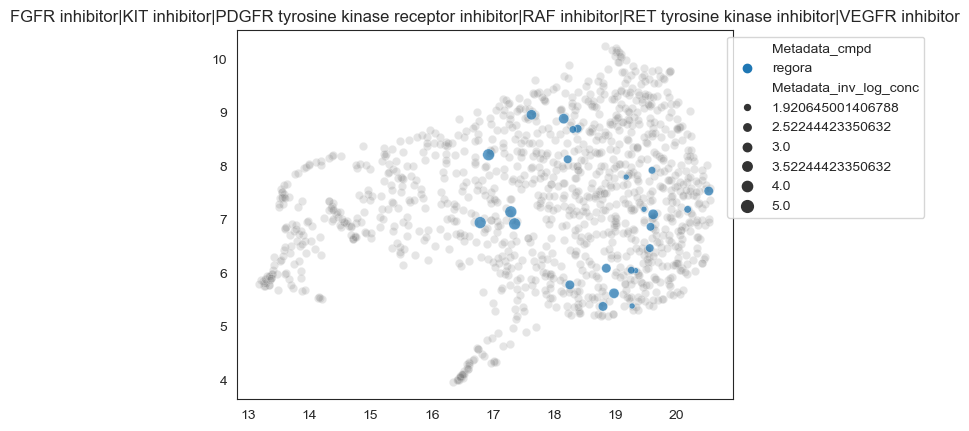

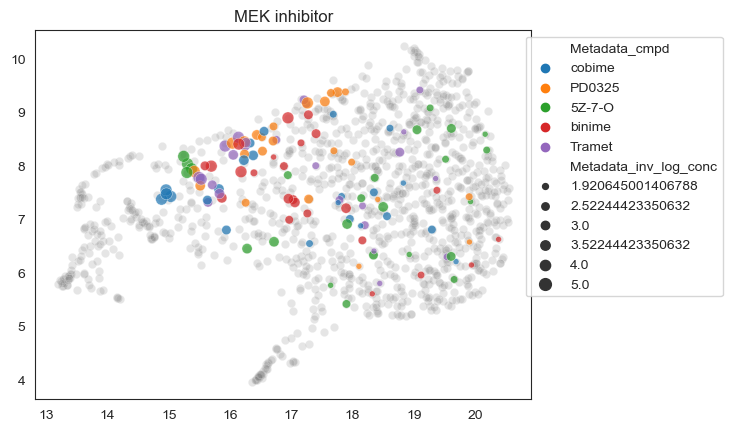

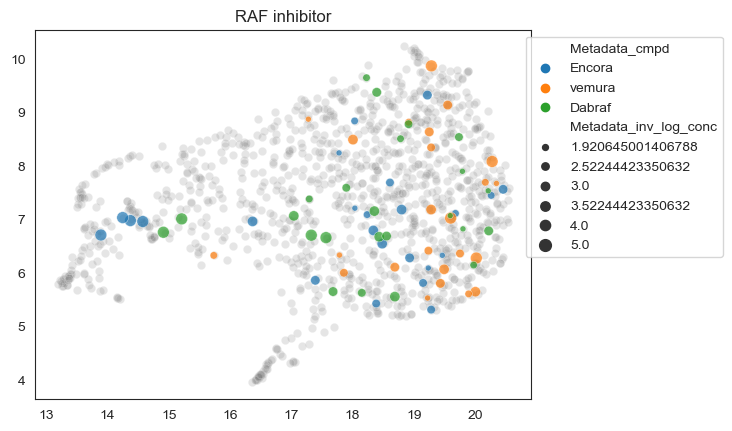

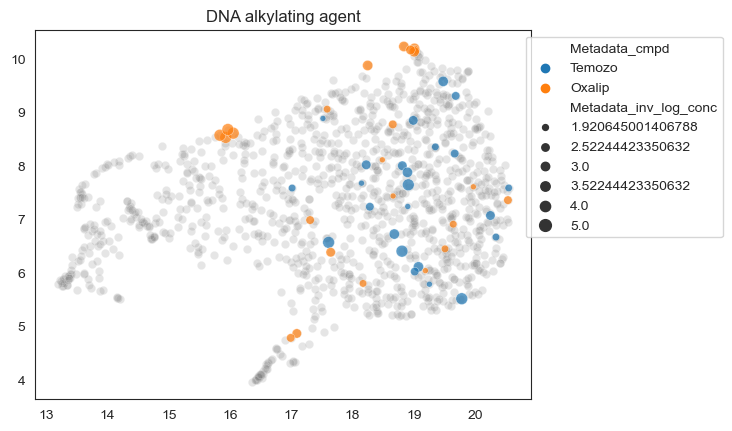

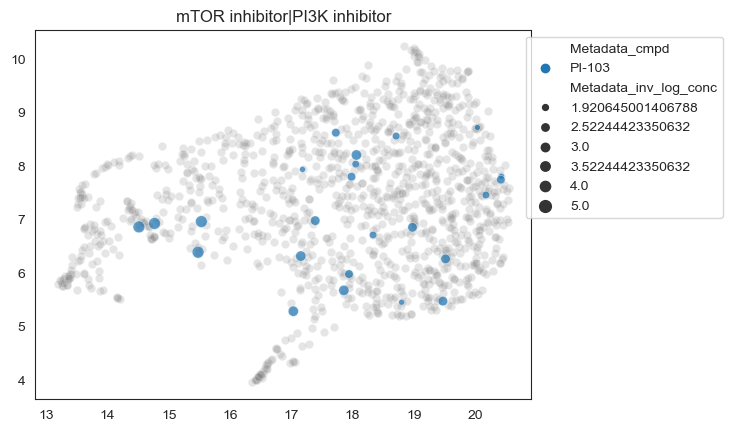

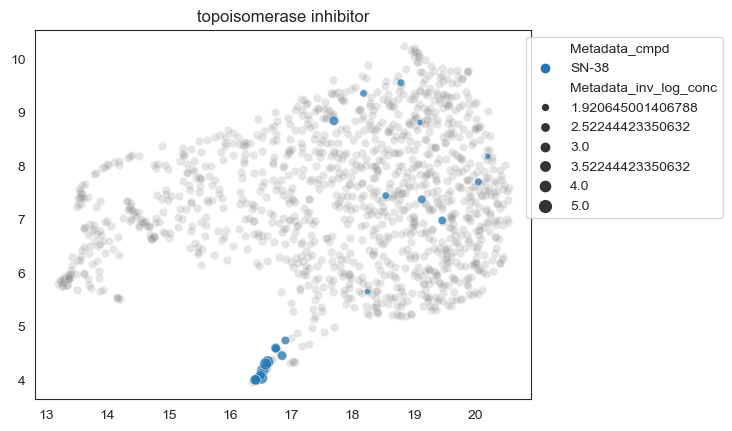

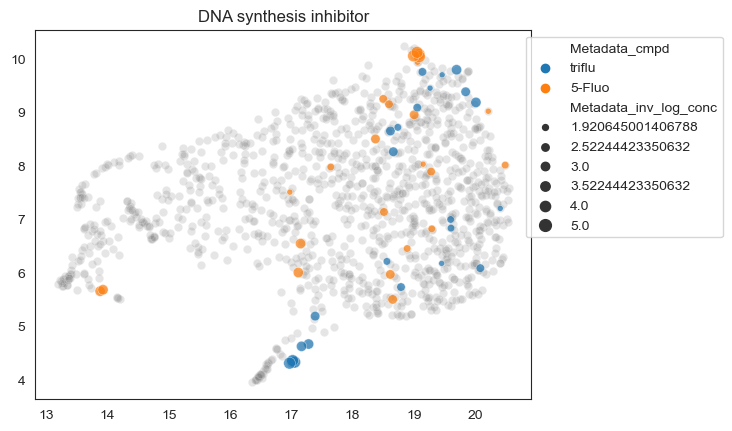

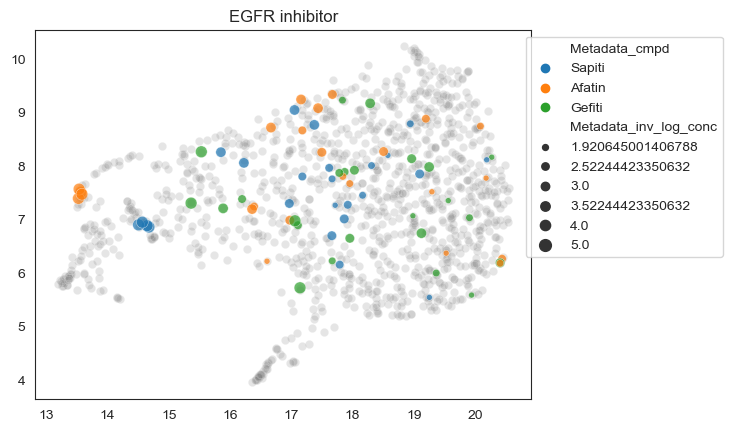

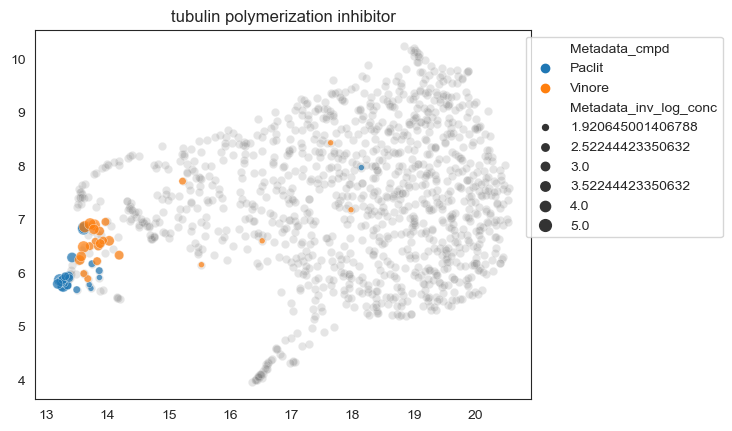

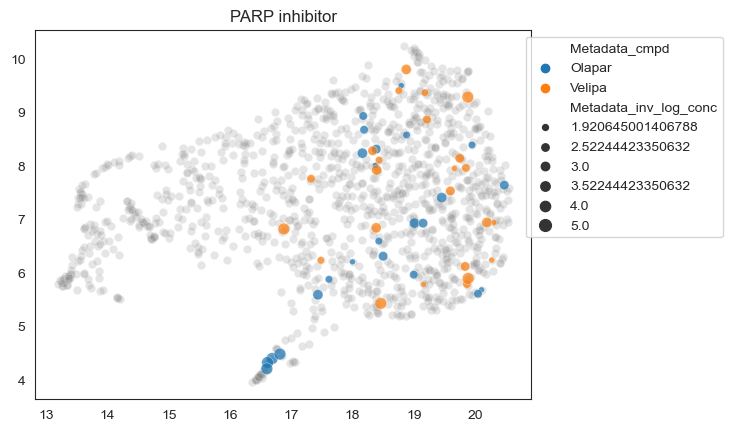

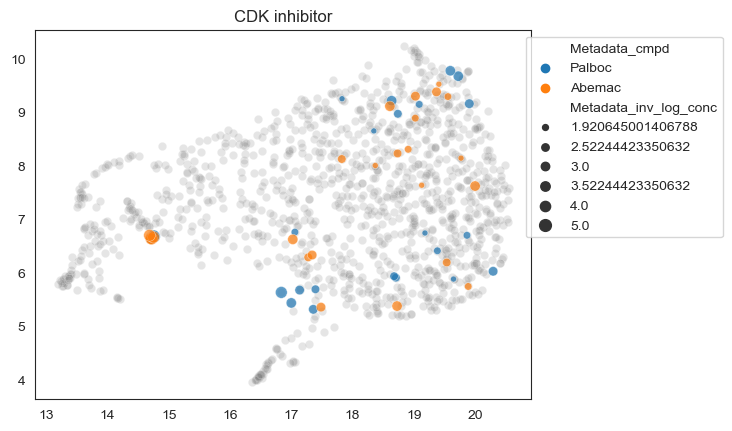

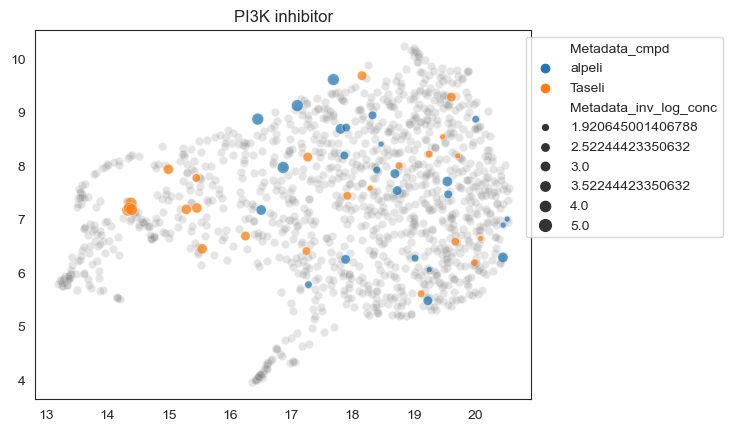

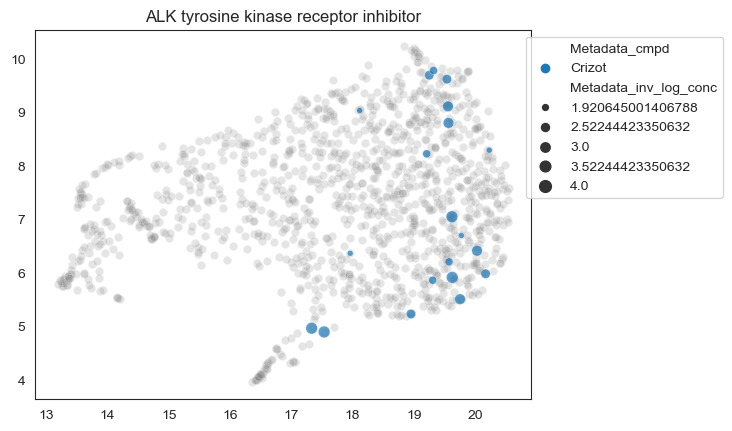

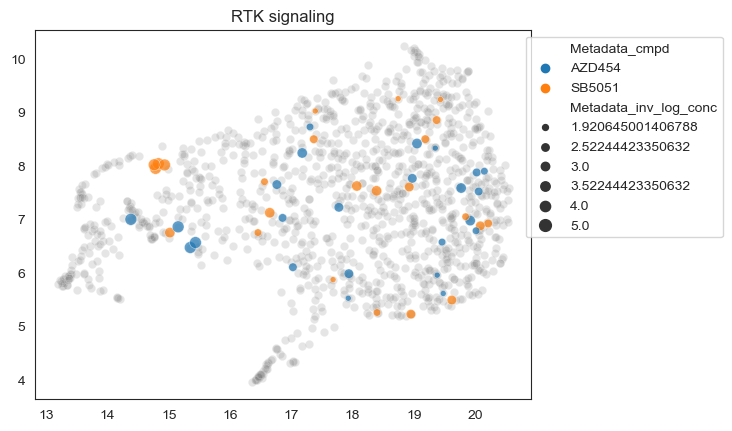

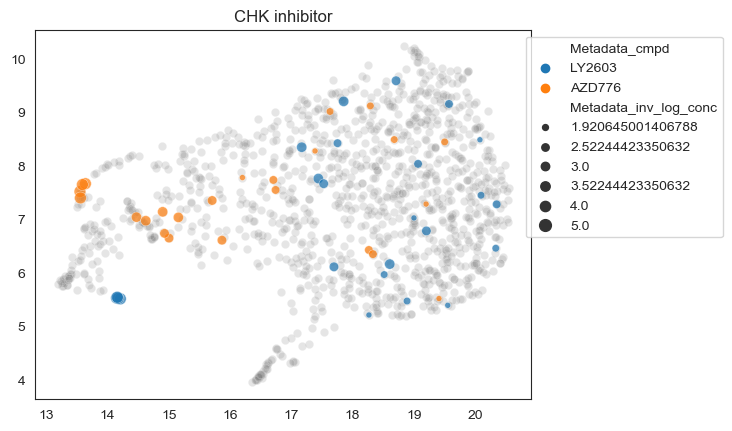

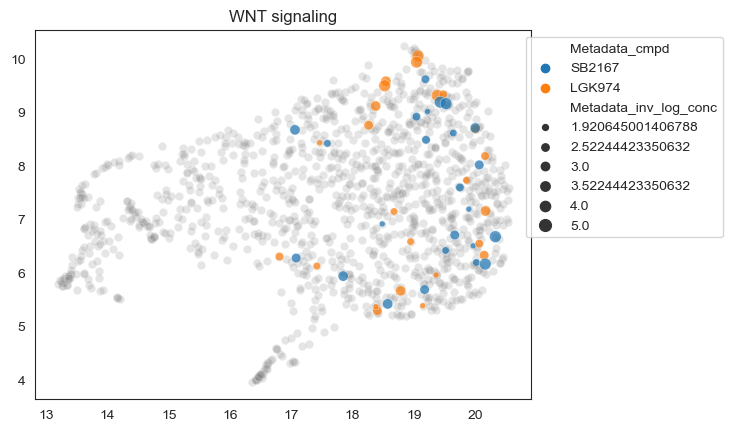

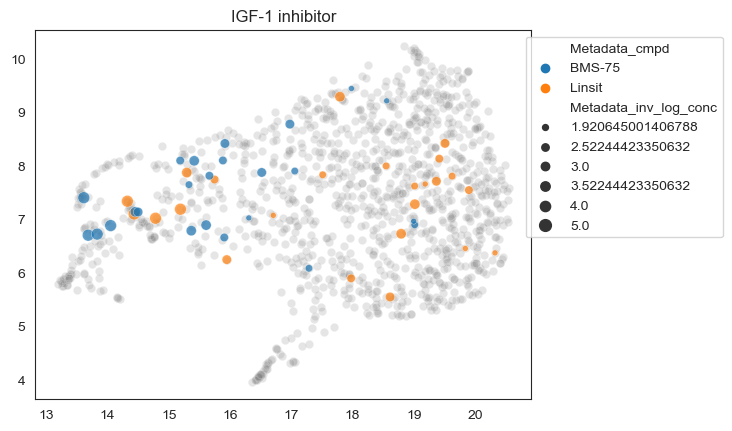

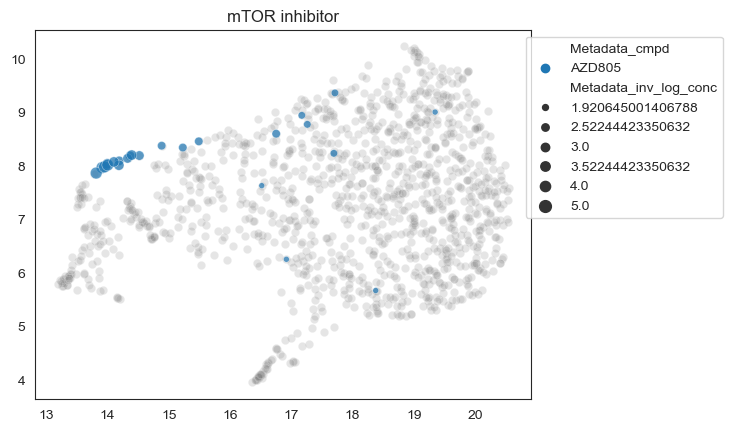

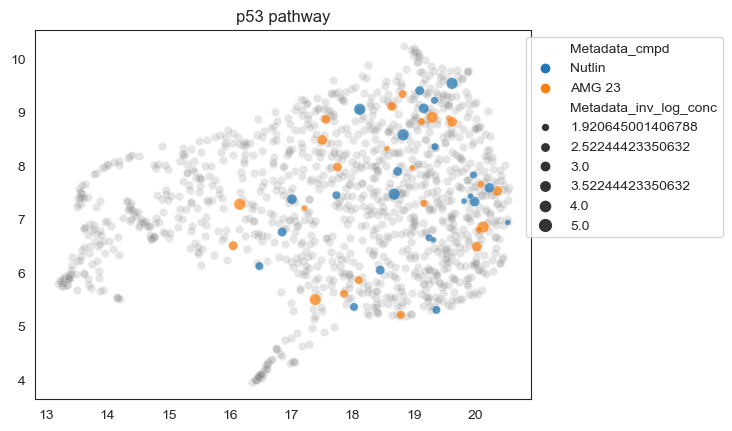

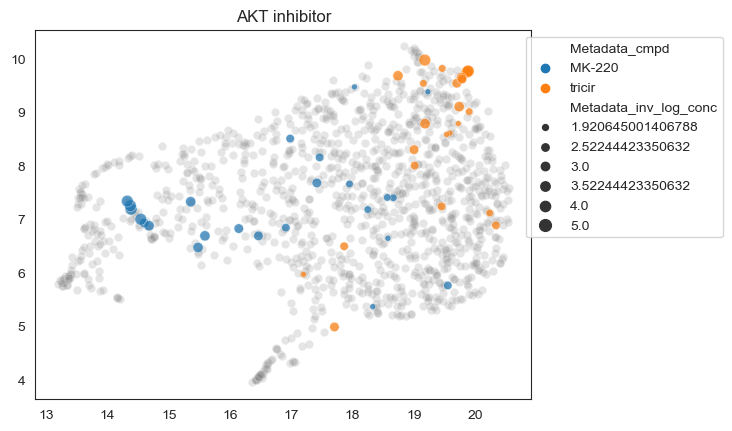

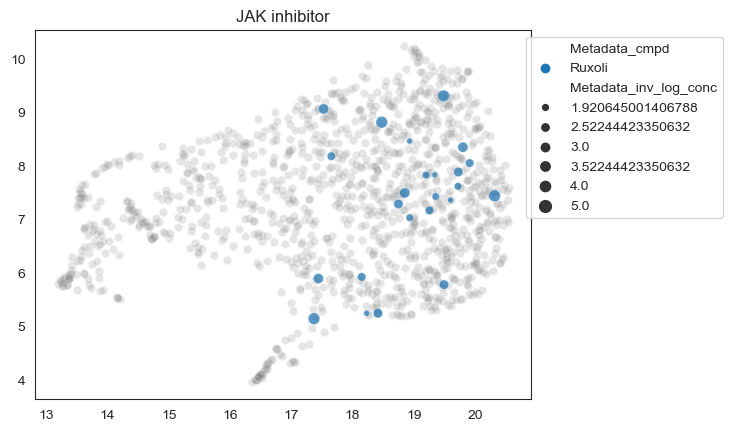

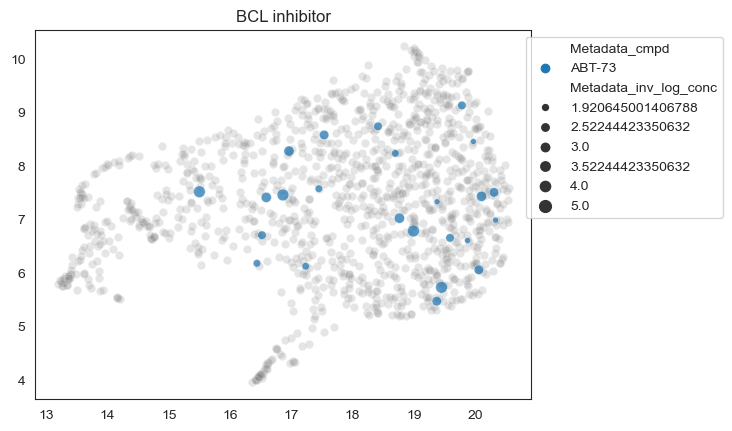

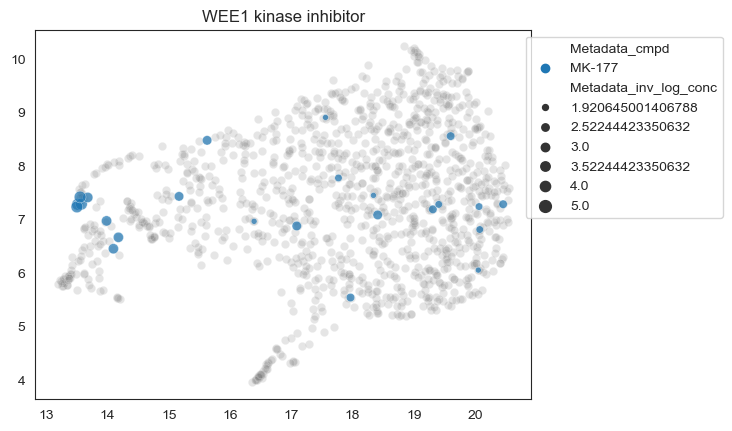

In [51]:
## UMAP - MOA

for moa in ListOfMoa:

    fig = plt.figure()
    ax = sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        c='gray',
        alpha=(0.2),
        marker="o",
        legend=False,
        )

    ax = sns.scatterplot(
        x=embedding[(df_toplot['Metadata_moa'] == moa),0],
        y=embedding[(df_toplot['Metadata_moa'] == moa),1],
        hue=df_toplot[df_toplot['Metadata_moa'] == moa].Metadata_cmpd,
        alpha=(0.7),
        marker="o",
        size=df_toplot[df_toplot['Metadata_moa'] == moa].Metadata_inv_log_conc
        )

    plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')
    plt.title(moa)    